### Data Collection !

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import glob

###### This is different approach to collecting tha data

The glob module in Python is used to retrieve files and directories' paths based on specified patterns or wildcards in a directory. It provides a way to search for files and directories that match a specific pattern, making it easier to work with multiple files or to process a subset of files in a directory.

In [4]:
glob.glob(r"C:\Users\karan\Desktop\Videos and Materials\Project on Data Analysis\DA Project 2 - Stock Market Analysis\individual_stocks_5yr/*csv")

['C:\\Users\\karan\\Desktop\\Videos and Materials\\Project on Data Analysis\\DA Project 2 - Stock Market Analysis\\individual_stocks_5yr\\AAL_data.csv',
 'C:\\Users\\karan\\Desktop\\Videos and Materials\\Project on Data Analysis\\DA Project 2 - Stock Market Analysis\\individual_stocks_5yr\\AAPL_data.csv',
 'C:\\Users\\karan\\Desktop\\Videos and Materials\\Project on Data Analysis\\DA Project 2 - Stock Market Analysis\\individual_stocks_5yr\\AAP_data.csv',
 'C:\\Users\\karan\\Desktop\\Videos and Materials\\Project on Data Analysis\\DA Project 2 - Stock Market Analysis\\individual_stocks_5yr\\ABBV_data.csv',
 'C:\\Users\\karan\\Desktop\\Videos and Materials\\Project on Data Analysis\\DA Project 2 - Stock Market Analysis\\individual_stocks_5yr\\ABC_data.csv',
 'C:\\Users\\karan\\Desktop\\Videos and Materials\\Project on Data Analysis\\DA Project 2 - Stock Market Analysis\\individual_stocks_5yr\\ABT_data.csv',
 'C:\\Users\\karan\\Desktop\\Videos and Materials\\Project on Data Analysis\\DA 

In [5]:
len(glob.glob(r"C:\Users\karan\Desktop\Videos and Materials\Project on Data Analysis\DA Project 2 - Stock Market Analysis\individual_stocks_5yr/*csv"))

509

In [74]:
company_list = [
    r"C:\\Users\\karan\\Desktop\\Videos and Materials\\Project on Data Analysis\\DA Project 2 - Stock Market Analysis\\individual_stocks_5yr\\AAPL_data.csv",
    r"C:\\Users\\karan\\Desktop\\Videos and Materials\\Project on Data Analysis\\DA Project 2 - Stock Market Analysis\\individual_stocks_5yr\\AMZN_data.csv",
    r"C:\\Users\\karan\\Desktop\\Videos and Materials\\Project on Data Analysis\\DA Project 2 - Stock Market Analysis\\individual_stocks_5yr\\GOOG_data.csv",
    r"C:\\Users\\karan\\Desktop\\Videos and Materials\\Project on Data Analysis\\DA Project 2 - Stock Market Analysis\\individual_stocks_5yr\\MSFT_data.csv" 
]

In [75]:
import warnings
from warnings import filterwarnings
filterwarnings("ignore")

In [76]:
all_data = pd.DataFrame()

for file in company_list:
    
    current_df = pd.read_csv(file)
    
    all_data = current_df.append(all_data, ignore_index = True)
    
    # ignore_index is used to ignore by default index of company_list
    
    # full_df = pd.concat([full_df, current_df], ignore_index = True)

In [77]:
all_data.shape

(4752, 7)

In [78]:
all_data.head(6)

,date,open,high,low,close,volume,Name
0,2013-02-08,27.35,27.71,27.310,27.55,33318306,MSFT
1,2013-02-11,27.65,27.92,27.500,27.86,32247549,MSFT
2,2013-02-12,27.88,28.00,27.750,27.88,35990829,MSFT
3,2013-02-13,27.93,28.11,27.880,28.03,41715530,MSFT
4,2013-02-14,27.92,28.06,27.870,28.04,32663174,MSFT
5,2013-02-15,28.04,28.16,27.875,28.01,49650538,MSFT


In [79]:
all_data["Name"].unique()

# all_data is raw data

array(['MSFT', 'GOOG', 'AMZN', 'AAPL'], dtype=object)

### What was the change in price of the stock overtime?

In [80]:
all_data.isnull().sum()

date      0
open      0
high      0
low       0
close     0
volume    0
Name      0
dtype: int64

In [81]:
all_data.dtypes

date       object
open      float64
high      float64
low       float64
close     float64
volume      int64
Name       object
dtype: object

In [82]:
all_data["date"] = pd.to_datetime(all_data["date"])

In [83]:
all_data.dtypes

date      datetime64[ns]
open             float64
high             float64
low              float64
close            float64
volume             int64
Name              object
dtype: object

In [84]:
tech_list = all_data["Name"].unique()

In [85]:
tech_list

array(['MSFT', 'GOOG', 'AMZN', 'AAPL'], dtype=object)

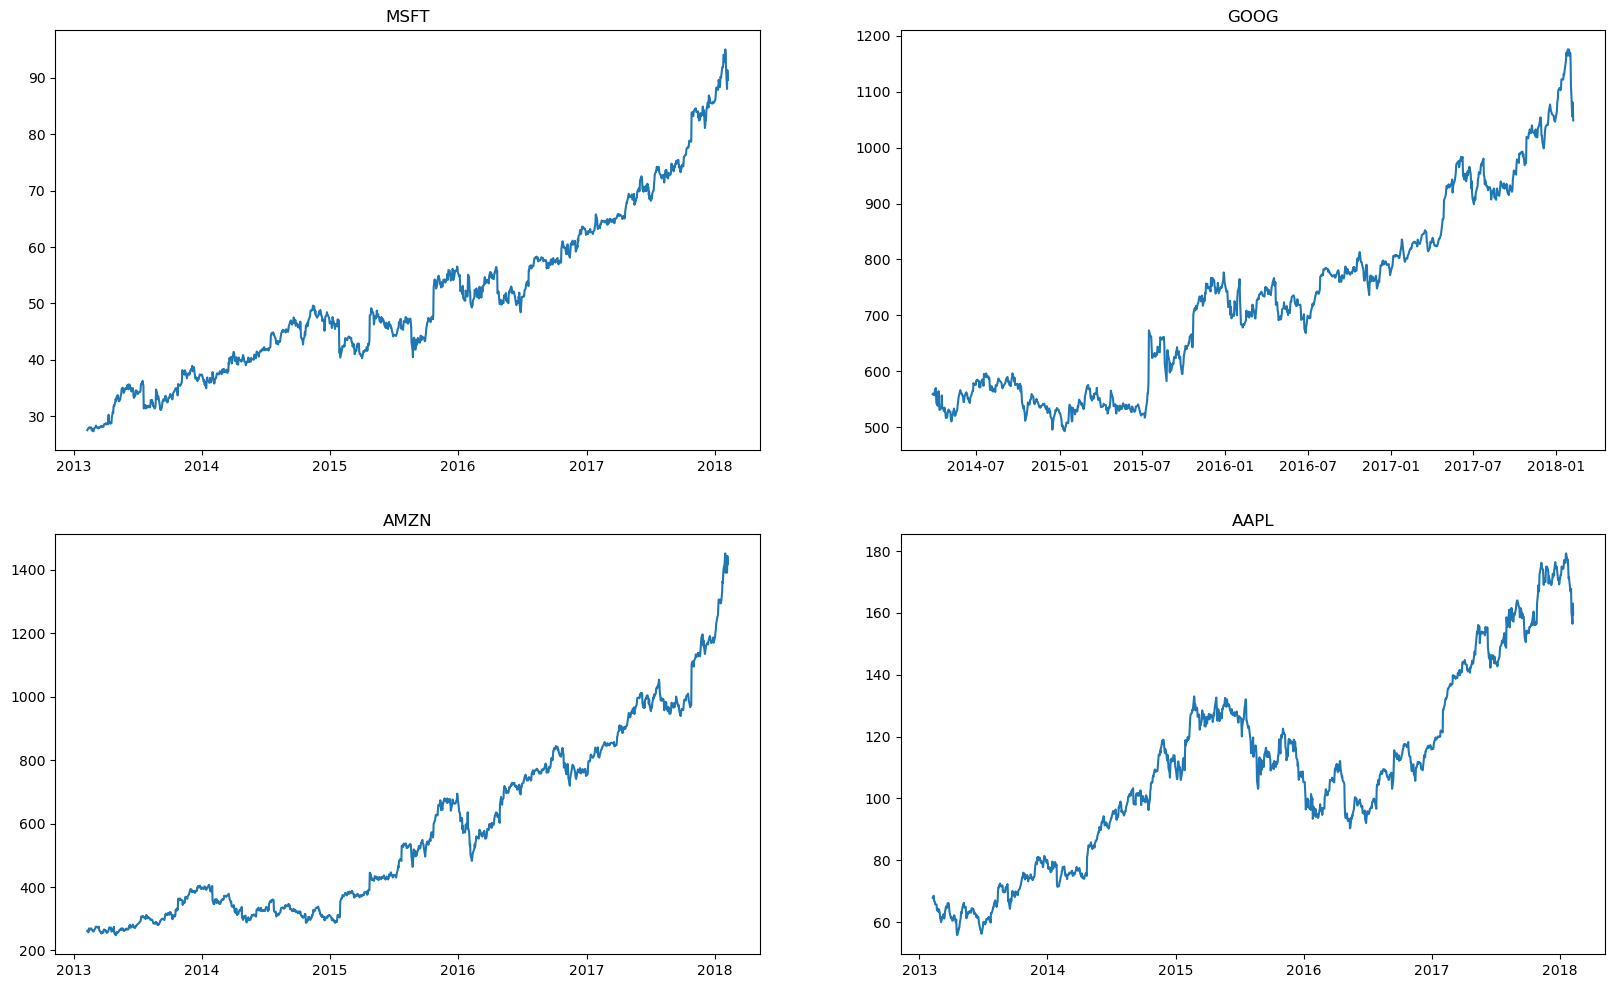

In [98]:
plt.figure(figsize = (20,12))

for index, company in enumerate(tech_list,1):
    plt.subplot(2,2,index)
    filter1 = all_data["Name"]==company
    df = all_data[filter1]
    plt.plot(df["date"],df["close"])
    plt.title(company)

### What was moving average of various stocks?
removing noise from data

In [87]:
all_data.head(15)

,date,open,high,low,close,volume,Name
0,2013-02-08,27.3500,27.71,27.310,27.550,33318306,MSFT
1,2013-02-11,27.6500,27.92,27.500,27.860,32247549,MSFT
2,2013-02-12,27.8800,28.00,27.750,27.880,35990829,MSFT
3,2013-02-13,27.9300,28.11,27.880,28.030,41715530,MSFT
4,2013-02-14,27.9200,28.06,27.870,28.040,32663174,MSFT
5,2013-02-15,28.0400,28.16,27.875,28.010,49650538,MSFT
6,2013-02-19,27.8801,28.09,27.800,28.045,38804616,MSFT
7,2013-02-20,28.1300,28.20,27.830,27.870,44109412,MSFT
8,2013-02-21,27.7400,27.74,27.230,27.490,49078338,MSFT
9,2013-02-22,27.6800,27.76,27.480,27.760,31425726,MSFT


In [162]:
all_data["close"].rolling(window = 10).mean().head(14)

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
5         NaN
6         NaN
7         NaN
8         NaN
9     27.8535
10    27.8355
11    27.7865
12    27.7795
13    27.7565
Name: close, dtype: float64

In [89]:
new_data = all_data.copy()

In [90]:
ma_day = [10, 20, 50]

for ma in ma_day:
    new_data["close_"+str(ma)] = new_data["close"].rolling(ma).mean()

In [91]:
new_data.tail(7)

,date,open,high,low,close,volume,Name,close_10,close_20,close_50
4745,2018-01-30,165.525,167.3700,164.7000,166.97,46048185,AAPL,174.263,174.3340,172.9460
4746,2018-01-31,166.870,168.4417,166.5000,167.43,32478930,AAPL,173.096,174.0925,172.8726
4747,2018-02-01,167.165,168.6200,166.7600,167.78,47230787,AAPL,171.948,173.8700,172.8252
4748,2018-02-02,166.000,166.8000,160.1000,160.50,86593825,AAPL,170.152,173.2435,172.6356
4749,2018-02-05,159.100,163.8800,156.0000,156.49,72738522,AAPL,168.101,172.3180,172.3026
4750,2018-02-06,154.830,163.7200,154.0000,163.03,68243838,AAPL,166.700,171.7520,172.0640
4751,2018-02-07,163.085,163.4000,159.0685,159.54,51608580,AAPL,165.232,171.0125,171.7554


Below code is from previous analysis


plt.figure(figsize = (20,12))

for index, company in enumerate(tech_list,1):

    plt.subplot(2,2,index)
    
    filter1 = all_data["Name"]==company
   
    df = all_data[filter1]
    
    plt.plot(df["date"],df["close"])
    
    plt.title(company)
    
    
###### Instead of using matplotlib, now we will try pandas    

In [92]:
new_data.set_index("date", inplace = True)

In [93]:
new_data.columns

Index(['open', 'high', 'low', 'close', 'volume', 'Name', 'close_10',
       'close_20', 'close_50'],
      dtype='object')

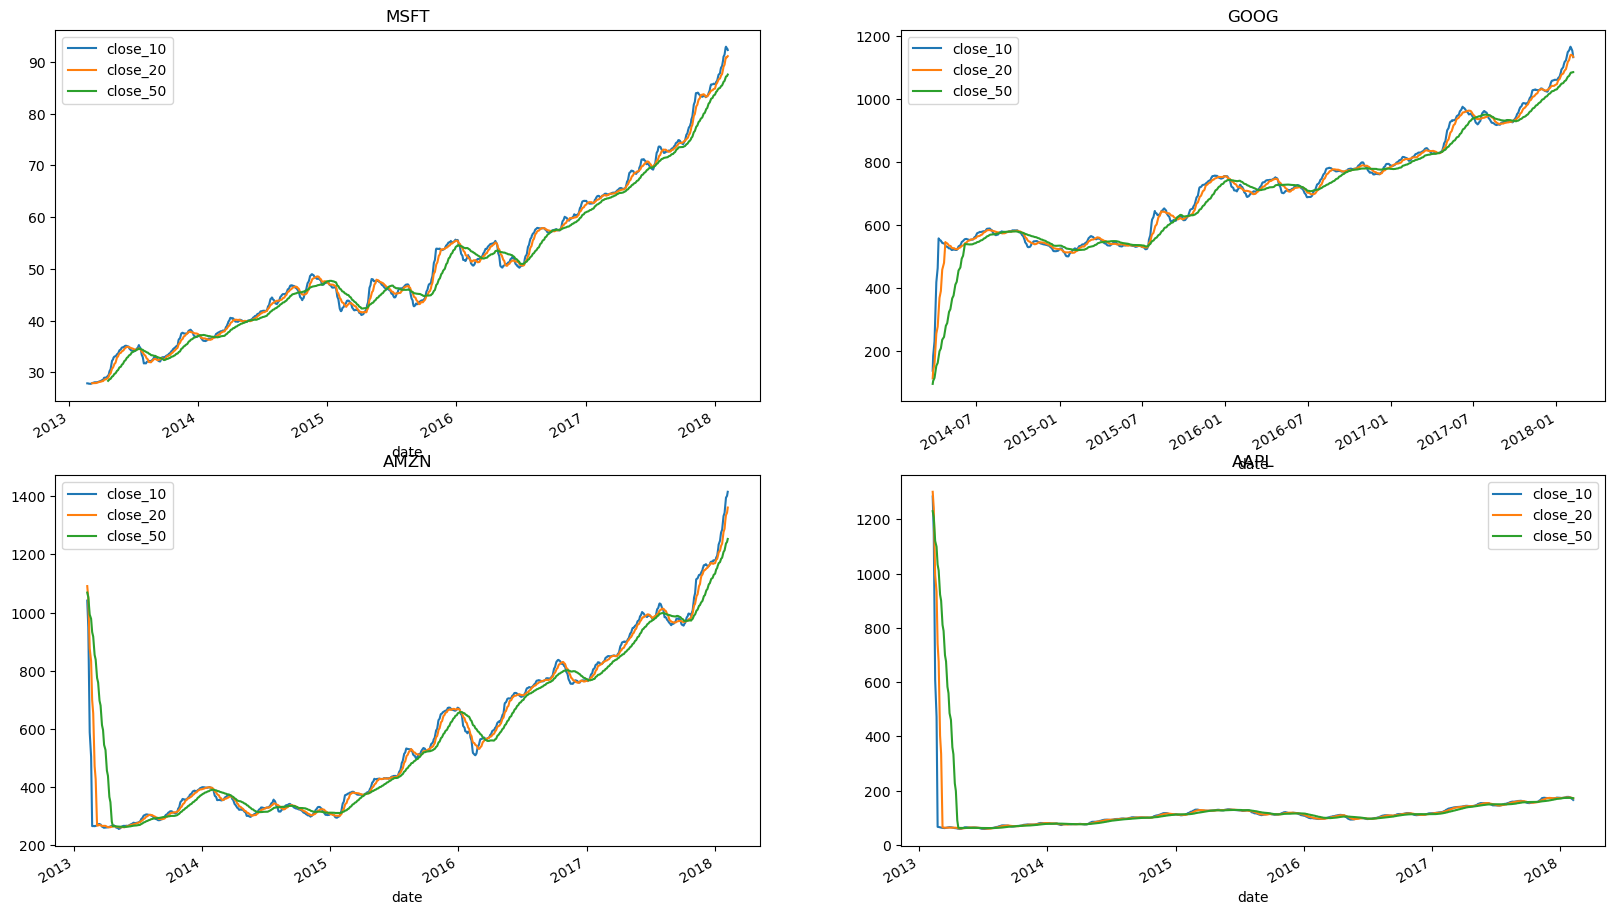

In [124]:
plt.figure(figsize = (20,12))

for index, company in enumerate(tech_list,1):
    plt.subplot(2,2,index)
    filter1 = new_data["Name"]==company
    df = new_data[filter1]
    df[["close_10","close_20","close_50"]].plot(ax = plt.gca())
    plt.title(company)

Imagine you are drawing a picture on a piece of paper. The piece of paper is like the "canvas," and you use a pencil or paintbrush to draw your picture. Now, you want to add a label to the picture or change its title. To do that, you need to know where the drawing is on the paper. In Matplotlib, the "canvas" is like the paper, and the "axes" is like the area where your plot is drawn.

### Analyse closing price change in apple stock

In [125]:
company_list

['C:\\\\Users\\\\karan\\\\Desktop\\\\Videos and Materials\\\\Project on Data Analysis\\\\DA Project 2 - Stock Market Analysis\\\\individual_stocks_5yr\\\\AAPL_data.csv',
 'C:\\\\Users\\\\karan\\\\Desktop\\\\Videos and Materials\\\\Project on Data Analysis\\\\DA Project 2 - Stock Market Analysis\\\\individual_stocks_5yr\\\\AMZN_data.csv',
 'C:\\\\Users\\\\karan\\\\Desktop\\\\Videos and Materials\\\\Project on Data Analysis\\\\DA Project 2 - Stock Market Analysis\\\\individual_stocks_5yr\\\\GOOG_data.csv',
 'C:\\\\Users\\\\karan\\\\Desktop\\\\Videos and Materials\\\\Project on Data Analysis\\\\DA Project 2 - Stock Market Analysis\\\\individual_stocks_5yr\\\\MSFT_data.csv']

In [127]:
apple = pd.read_csv(r"C:\\\\Users\\\\karan\\\\Desktop\\\\Videos and Materials\\\\Project on Data Analysis\\\\DA Project 2 - Stock Market Analysis\\\\individual_stocks_5yr\\\\AAPL_data.csv")

In [128]:
apple.head(4)

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL


In [130]:
apple["close"]

0        67.8542
1        68.5614
2        66.8428
3        66.7156
4        66.6556
          ...   
1254    167.7800
1255    160.5000
1256    156.4900
1257    163.0300
1258    159.5400
Name: close, Length: 1259, dtype: float64

In [132]:
apple.head(4)

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL


In [138]:
apple["Daily Return(in %)"] = apple["close"].pct_change() * 100

In [139]:
apple.head(4)

,date,open,high,low,close,volume,Name,Daily Return(in %)
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,NaN
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,1.042235
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-2.506658
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-0.190297


In [141]:
import plotly.express as px

In [143]:
px.line(apple, x = "date", y = "Daily Return(in %)")

### Performing resampling analysis of closing price

In [144]:
apple.dtypes

date                   object
open                  float64
high                  float64
low                   float64
close                 float64
volume                  int64
Name                   object
Daily Return(in %)    float64
dtype: object

In [145]:
apple["date"] = pd.to_datetime(apple["date"])

In [146]:
apple.dtypes

date                  datetime64[ns]
open                         float64
high                         float64
low                          float64
close                        float64
volume                         int64
Name                          object
Daily Return(in %)           float64
dtype: object

In [147]:
apple.head(4)

,date,open,high,low,close,volume,Name,Daily Return(in %)
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,NaN
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,1.042235
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-2.506658
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-0.190297


In [148]:
apple.set_index("date", inplace = True)

In [149]:
apple.head(4)

,open,high,low,close,volume,Name,Daily Return(in %)
date,,,,,,,
2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,NaN
2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,1.042235
2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-2.506658
2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-0.190297


In [150]:
apple["close"].resample("M").mean()

date
2013-02-28     65.306264
2013-03-31     63.120110
2013-04-30     59.966432
2013-05-31     63.778927
2013-06-30     60.791120
                 ...    
2017-10-31    157.817273
2017-11-30    172.406190
2017-12-31    171.891500
2018-01-31    174.005238
2018-02-28    161.468000
Freq: M, Name: close, Length: 61, dtype: float64

<Axes: xlabel='date'>

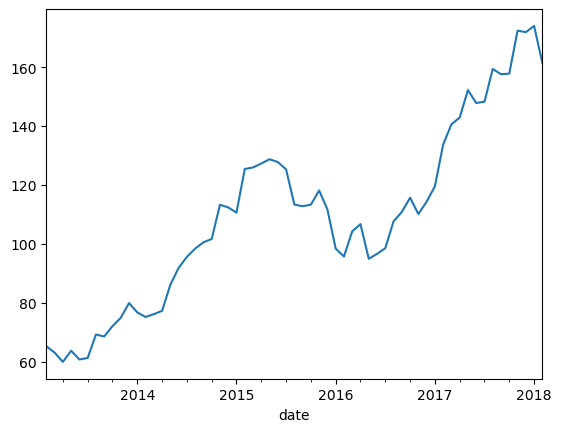

In [151]:
apple["close"].resample("M").mean().plot(kind = "line")

In [153]:
apple["close"].resample("Y").mean()

date
2013-12-31     67.237839
2014-12-31     92.264531
2015-12-31    120.039861
2016-12-31    104.604008
2017-12-31    150.585080
2018-12-31    171.594231
Freq: A-DEC, Name: close, dtype: float64

<Axes: xlabel='date'>

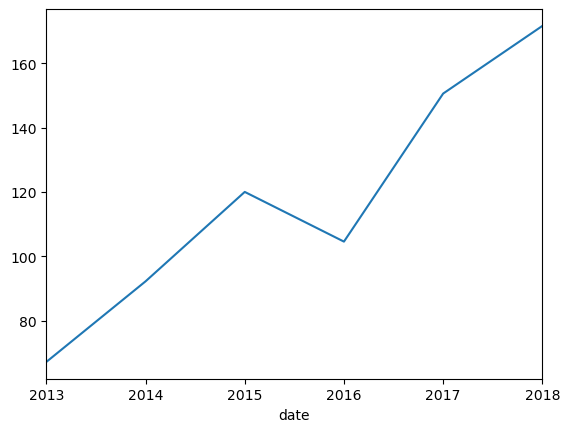

In [155]:
apple["close"].resample("Y").mean().plot(kind = "line")

In [156]:
apple["close"].resample("Q").mean()

date
2013-03-31     64.020291
2013-06-30     61.534692
2013-09-30     66.320670
2013-12-31     75.567478
2014-03-31     76.086293
2014-06-30     85.117475
2014-09-30     98.163311
2014-12-31    108.821016
2015-03-31    120.776721
2015-06-30    127.937937
2015-09-30    117.303438
2015-12-31    114.299297
2016-03-31     99.655082
2016-06-30     99.401250
2016-09-30    105.866094
2016-12-31    113.399048
2017-03-31    131.712500
2017-06-30    147.875397
2017-09-30    155.304603
2017-12-31    167.148254
2018-03-31    171.594231
Freq: Q-DEC, Name: close, dtype: float64

<Axes: xlabel='date'>

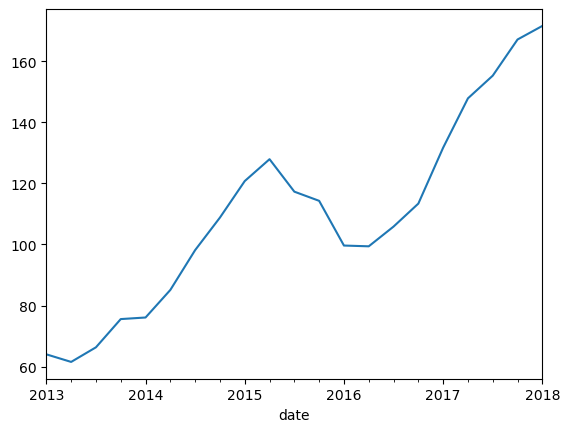

In [157]:
apple["close"].resample("Q").mean().plot(kind = "line")

In [169]:
# apple["close"].rolling(window = 14).mean().head(50)

# Try this if you're free

### Checking if the closing prices of these tech companies (Amazon, Apple, Google, Microsoft) are correlated or not !

In [184]:
company_list

['C:\\\\Users\\\\karan\\\\Desktop\\\\Videos and Materials\\\\Project on Data Analysis\\\\DA Project 2 - Stock Market Analysis\\\\individual_stocks_5yr\\\\AAPL_data.csv',
 'C:\\\\Users\\\\karan\\\\Desktop\\\\Videos and Materials\\\\Project on Data Analysis\\\\DA Project 2 - Stock Market Analysis\\\\individual_stocks_5yr\\\\AMZN_data.csv',
 'C:\\\\Users\\\\karan\\\\Desktop\\\\Videos and Materials\\\\Project on Data Analysis\\\\DA Project 2 - Stock Market Analysis\\\\individual_stocks_5yr\\\\GOOG_data.csv',
 'C:\\\\Users\\\\karan\\\\Desktop\\\\Videos and Materials\\\\Project on Data Analysis\\\\DA Project 2 - Stock Market Analysis\\\\individual_stocks_5yr\\\\MSFT_data.csv']

In [195]:
apple = pd.read_csv(company_list[0])

In [196]:
amazon = pd.read_csv(company_list[1])

In [197]:
google = pd.read_csv(company_list[2])

In [198]:
microsoft = pd.read_csv(company_list[3])

In [199]:
Closing_Price = pd.DataFrame()

Closing_Price["cl_apple"] = apple["close"]
Closing_Price["cl_amazon"] = amazon["close"] 
Closing_Price["cl_google"] = google["close"] 
Closing_Price["cl_microsoft"] = microsoft["close"] 

In [200]:
Closing_Price.head(4)

,cl_apple,cl_amazon,cl_google,cl_microsoft
0,67.8542,261.95,558.46,27.55
1,68.5614,257.21,559.99,27.86
2,66.8428,258.70,556.97,27.88
3,66.7156,269.47,567.16,28.03


In [201]:
Closing_Price[["cl_apple","cl_amazon","cl_google","cl_microsoft"]].corr()

,cl_apple,cl_amazon,cl_google,cl_microsoft
cl_apple,1.000000,0.819078,0.640522,0.899689
cl_amazon,0.819078,1.000000,0.888456,0.955977
cl_google,0.640522,0.888456,1.000000,0.907011
cl_microsoft,0.899689,0.955977,0.907011,1.000000


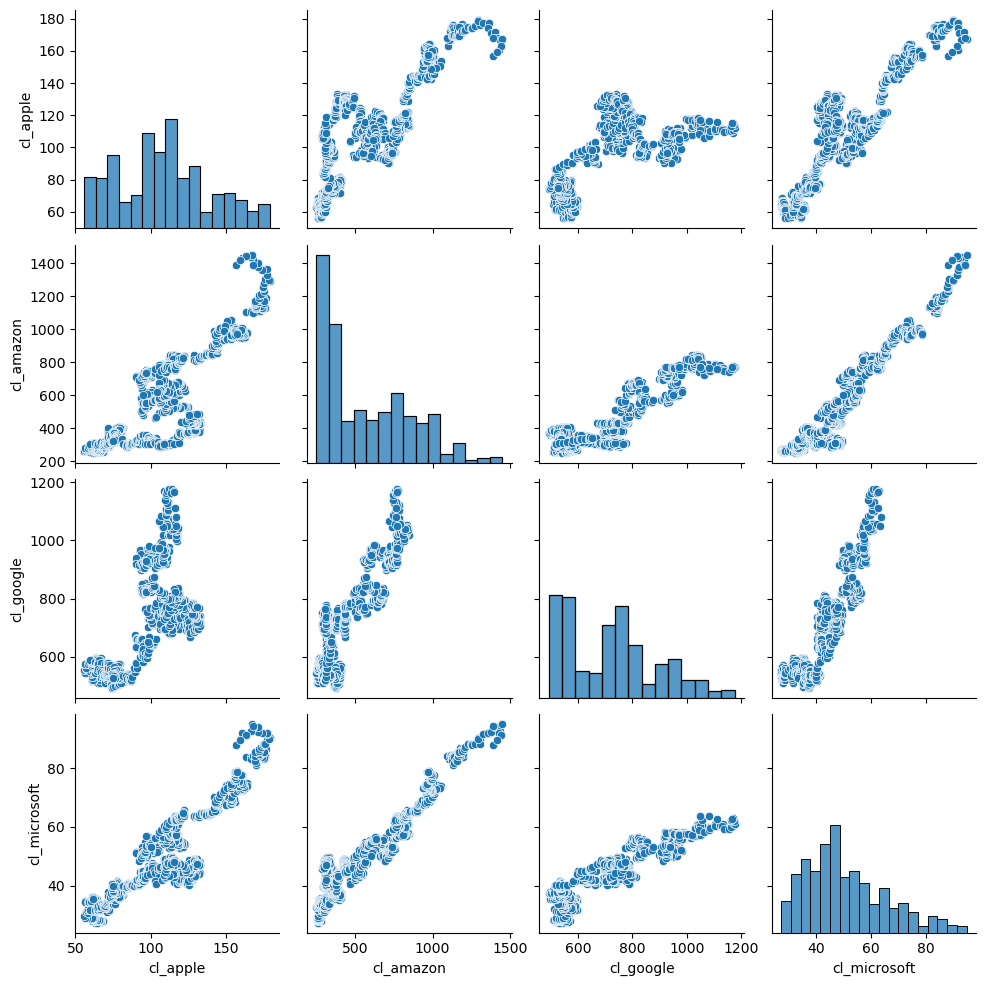

In [202]:
sns.pairplot(Closing_Price)

<Axes: >

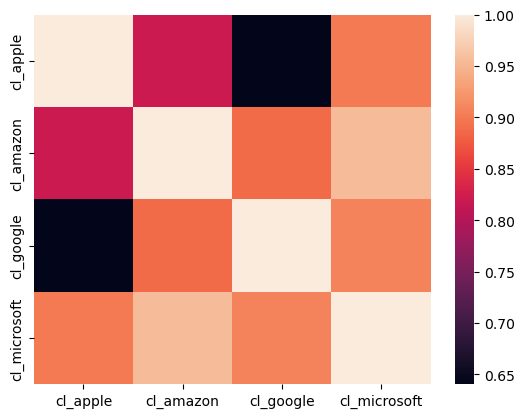

In [206]:
sns.heatmap(Closing_Price.corr())

<Axes: >

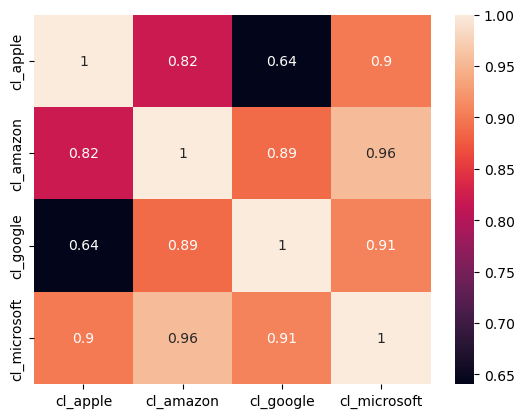

In [207]:
sns.heatmap(Closing_Price.corr(), annot = True)

### To analyse whether Daily change in Closing Price of Stocks (or Daily Returns in Stocks) are co-related or not !

In [208]:
Closing_Price

,cl_apple,cl_amazon,cl_google,cl_microsoft
0,67.8542,261.95,558.46,27.55
1,68.5614,257.21,559.99,27.86
2,66.8428,258.70,556.97,27.88
3,66.7156,269.47,567.16,28.03
4,66.6556,269.24,567.00,28.04
...,...,...,...,...
1254,167.7800,1390.00,NaN,94.26
1255,160.5000,1429.95,NaN,91.78
1256,156.4900,1390.00,NaN,88.00
1257,163.0300,1442.84,NaN,91.33


In [209]:
Closing_Price["cl_apple"]

0        67.8542
1        68.5614
2        66.8428
3        66.7156
4        66.6556
          ...   
1254    167.7800
1255    160.5000
1256    156.4900
1257    163.0300
1258    159.5400
Name: cl_apple, Length: 1259, dtype: float64

In [210]:
Closing_Price["cl_apple"].shift(1)

0            NaN
1        67.8542
2        68.5614
3        66.8428
4        66.7156
          ...   
1254    167.4300
1255    167.7800
1256    160.5000
1257    156.4900
1258    163.0300
Name: cl_apple, Length: 1259, dtype: float64

In [211]:
(Closing_Price["cl_apple"] - Closing_Price["cl_apple"].shift(1))/(Closing_Price["cl_apple"].shift(1)) * 100

0            NaN
1       1.042235
2      -2.506658
3      -0.190297
4      -0.089934
          ...   
1254    0.209043
1255   -4.339015
1256   -2.498442
1257    4.179181
1258   -2.140710
Name: cl_apple, Length: 1259, dtype: float64

In [213]:
for col in Closing_Price.columns:
    Closing_Price[col+"_pct_change"] = (Closing_Price[col] - Closing_Price[col].shift(1))/(Closing_Price[col].shift(1)) * 100

In [214]:
Closing_Price

,cl_apple,cl_amazon,cl_google,cl_microsoft,cl_apple_pct_change,cl_amazon_pct_change,cl_google_pct_change,cl_microsoft_pct_change
0,67.8542,261.95,558.46,27.55,NaN,NaN,NaN,NaN
1,68.5614,257.21,559.99,27.86,1.042235,-1.809506,0.273968,1.125227
2,66.8428,258.70,556.97,27.88,-2.506658,0.579293,-0.539295,0.071788
3,66.7156,269.47,567.16,28.03,-0.190297,4.163123,1.829542,0.538020
4,66.6556,269.24,567.00,28.04,-0.089934,-0.085353,-0.028211,0.035676
...,...,...,...,...,...,...,...,...
1254,167.7800,1390.00,NaN,94.26,0.209043,-4.196734,NaN,-0.789391
1255,160.5000,1429.95,NaN,91.78,-4.339015,2.874101,NaN,-2.631021
1256,156.4900,1390.00,NaN,88.00,-2.498442,-2.793804,NaN,-4.118544
1257,163.0300,1442.84,NaN,91.33,4.179181,3.801439,NaN,3.784091


In [215]:
Closing_Price.columns

Index(['cl_apple', 'cl_amazon', 'cl_google', 'cl_microsoft',
       'cl_apple_pct_change', 'cl_amazon_pct_change', 'cl_google_pct_change',
       'cl_microsoft_pct_change'],
      dtype='object')

In [218]:
Closing_P = Closing_Price[["cl_apple_pct_change", "cl_amazon_pct_change", "cl_google_pct_change","cl_microsoft_pct_change"]]

In [219]:
Closing_P

,cl_apple_pct_change,cl_amazon_pct_change,cl_google_pct_change,cl_microsoft_pct_change
0,NaN,NaN,NaN,NaN
1,1.042235,-1.809506,0.273968,1.125227
2,-2.506658,0.579293,-0.539295,0.071788
3,-0.190297,4.163123,1.829542,0.538020
4,-0.089934,-0.085353,-0.028211,0.035676
...,...,...,...,...
1254,0.209043,-4.196734,NaN,-0.789391
1255,-4.339015,2.874101,NaN,-2.631021
1256,-2.498442,-2.793804,NaN,-4.118544
1257,4.179181,3.801439,NaN,3.784091


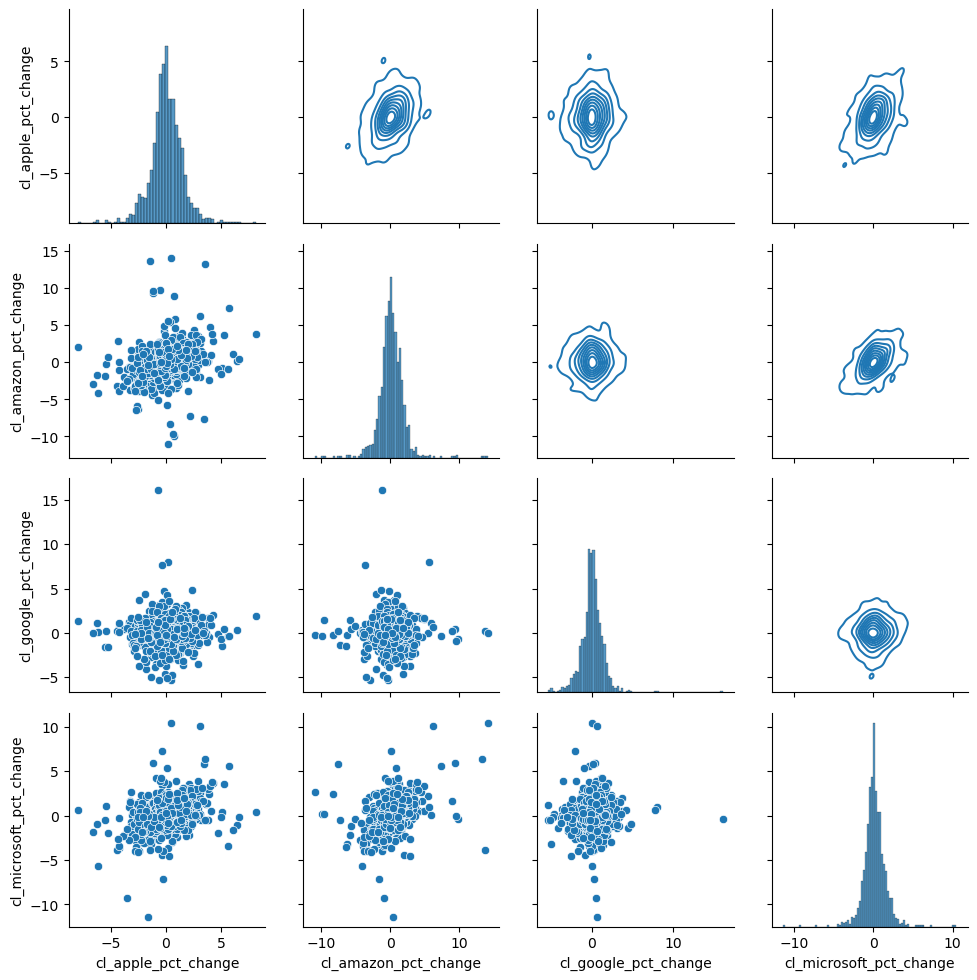

In [221]:
g = sns.PairGrid(data = Closing_P)
g.map_diag(sns.histplot)
g.map_lower(sns.scatterplot)
g.map_upper(sns.kdeplot)

In [222]:
Closing_P.corr()

,cl_apple_pct_change,cl_amazon_pct_change,cl_google_pct_change,cl_microsoft_pct_change
cl_apple_pct_change,1.000000,0.287659,0.036202,0.366598
cl_amazon_pct_change,0.287659,1.000000,0.027698,0.402678
cl_google_pct_change,0.036202,0.027698,1.000000,0.038939
cl_microsoft_pct_change,0.366598,0.402678,0.038939,1.000000
